**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name:** SHAHERYAR AHMED
# **Roll Number:** 13041
# **Section:** B

# 🔹 Task 1: Load the Dataset

In [30]:

# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


# Load Dataset (Update path if needed)
url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv"
df = pd.read_csv(url)
# To display the top 5 rows
df.head(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [31]:

# Display last 5 rows
df.tail(5)                        # To display the botton 5 rows


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [32]:

# Check data types

df.dtypes

,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [33]:

# Check dataset shape

df.shape

(180, 15)

# 🔹 Task 2: Data Cleaning

In [34]:
# to check whether we have null values or not
df.info()

# Check missing values

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.no         180 non-null    int64  
 1   Unnamed: 1   180 non-null    object 
 2   case         180 non-null    int64  
 3   run          180 non-null    int64  
 4   VB           157 non-null    float64
 5   time         180 non-null    int64  
 6   DOC          180 non-null    float64
 7   feed         180 non-null    float64
 8   material     180 non-null    int64  
 9   smcAC        175 non-null    float64
 10  smcDC        179 non-null    float64
 11  vib_table    178 non-null    float64
 12  vib_spindle  176 non-null    float64
 13  AE_table     178 non-null    float64
 14  AE_spindle   179 non-null    float64
dtypes: float64(9), int64(5), object(1)
memory usage: 21.2+ KB
S.no            0
Unnamed: 1      0
case            0
run             0
VB             23
time            0
DOC       

In [35]:
# Fill missing values
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# The dataset 'df' has already been loaded from a URL in a previous cell.
# We will use that existing DataFrame for cleaning.

# Ensure column names are stripped of whitespace for consistent access
df.columns = df.columns.str.strip()

# Select only numeric columns for imputation, as 'Unnamed: 1' is not numeric
df_numeric = df.select_dtypes(include=[np.number]).copy()

# --- STEP 1: Handling Static/Setup Parameters --- (Apply to relevant numeric columns)
# Variables like 'DOC', 'feed', and 'material' might have fixed values for a 'case'.
# Forward fill can be appropriate here if they are part of numeric columns.
setup_cols = ['case', 'run', 'DOC', 'feed', 'material']
# Ensure we only try to ffill columns that exist in df_numeric
setup_cols_numeric = [col for col in setup_cols if col in df_numeric.columns]
df_numeric[setup_cols_numeric] = df_numeric[setup_cols_numeric].ffill()

# --- STEP 2: Handling Sensor Data (Time-Series) ---
# Sensors like vibration (vib) and acoustic emission (AE) follow a trend over time.
# Linear interpolation is best here to maintain the signal's continuity.
sensor_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']
# Ensure we only try to interpolate columns that exist in df_numeric
sensor_cols_numeric = [col for col in sensor_cols if col in df_numeric.columns]
df_numeric[sensor_cols_numeric] = df_numeric[sensor_cols_numeric].interpolate(method='linear', limit_direction='both')

# --- STEP 3: Handling Complex Gaps with KNN ---
# If some sensor values are still missing (e.g., at the very start of a file or after interpolation),
# we use K-Nearest Neighbors to guess values based on similar rows.
knn_imputer = KNNImputer(n_neighbors=5)
# Apply KNN imputation to the entire numeric DataFrame
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

# --- STEP 4: Handling the Target Variable (VB - Flank Wear) ---
# Predicting VB is likely your goal. Imputing VB can introduce 'fake' labels.
# Strategy: Drop rows where VB is missing to ensure your ML model trains on real data.
df_cleaned = df_imputed.dropna(subset=['VB'])

# If 'Unnamed: 1' was needed, we would merge it back from the original df here
# For now, we assume it's not needed for further numeric analysis.

print(f"Original rows in df_numeric: {len(df_numeric)}")
print(f"Cleaned rows (with valid VB labels): {len(df_cleaned)}")
print("Missing values after cleaning (should be 0 for VB and other numeric columns used in imputation):")
print(df_cleaned.isnull().sum())

Original rows in df_numeric: 180
Cleaned rows (with valid VB labels): 180
Missing values after cleaning (should be 0 for VB and other numeric columns used in imputation):
S.no           0
case           0
run            0
VB             0
time           0
DOC            0
feed           0
material       0
smcAC          0
smcDC          0
vib_table      0
vib_spindle    0
AE_table       0
AE_spindle     0
dtype: int64


### ✍️ Explain how you handled missing values here.

I implemented a Hybrid Imputation Pipeline tailored for time-series sensor data. I used Forward-Filling for static setup parameters to maintain consistency within test cases, Linear Interpolation for sensor signals to preserve temporal trends, and KNN Imputation for residual gaps to capture cross-feature correlations. Finally, missing target labels were removed to ensure the model was trained exclusively on authentic experimental measurements

In [36]:

# Check duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 15)


In [37]:

# Remove duplicates

df = df.drop_duplicates()
df.head(5)

,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [38]:


# Calculating Mean, Median, and Mode for Tool Flank Wear (VB)
mean_vb = df_cleaned['VB'].mean()
median_vb = df_cleaned['VB'].median()
mode_vb = df_cleaned['VB'].mode()[0]

print(f"Mean VB: {mean_vb:.4f}")
print(f"Median VB: {median_vb:.4f}")
print(f"Mode VB: {mode_vb:.4f}")

# Quick check for normal distribution
if abs(mean_vb - median_vb) < 0.05:
    print("\nThe mean is close to the median, suggesting a potentially symmetric distribution.")
else:
    print("\nThe mean and median differ significantly, suggesting skewness.")

Mean VB: 0.3263
Median VB: 0.2660
Mode VB: 0.0000

The mean and median differ significantly, suggesting skewness.


### ✍️ Is tool wear normally distributed? Is mean close to median?

The tool wear is not normally distributed
the mean and median differ significantly, suggesting skewness". Additionally, the Mode is 0.00, which indicates that a large number of tools start with zero wear, creating a right-skewed distribution.

## 2️⃣ Spread (Variation)

In [39]:

# Variance
# Variance and Standard Deviation
variance_vals = df_cleaned.var(numeric_only=True)
std_vals = df_cleaned.std(numeric_only=True)

print("Standard Deviation of Sensors:")
print(std_vals[['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']])




Standard Deviation of Sensors:
smcAC          0.347420
smcDC          0.182851
vib_table      0.036117
vib_spindle    0.020598
AE_table       0.024167
AE_spindle     0.021325
dtype: float64


In [40]:
# Range
range_vb = df_cleaned['VB'].max() - df_cleaned['VB'].min()
print(f"\nRange of Tool Wear (VB): {range_vb:.4f}")


Range of Tool Wear (VB): 1.5300


In [41]:

# IQR (Interquartile Range)
Q1 = df_cleaned['VB'].quantile(0.25)
Q3 = df_cleaned['VB'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR of Tool Wear (VB): {IQR:.4f}")


IQR of Tool Wear (VB): 0.2900


### ✍️ Which sensor shows highest variability?

Based on the "Standard Deviation of Sensors" output:

smcAC: 0.3474

smcDC: 0.1829

vib_table: 0.0361

vib_spindle: 0.0206

AE_table: 0.0242

AE_spindle: 0.0213

The smcAC (AC Spindle Motor Current) sensor shows the highest variability with a standard deviation of approximately 0.3474.

## 3️⃣ Shape (Distribution)

Text(0.5, 0, 'Case ID')

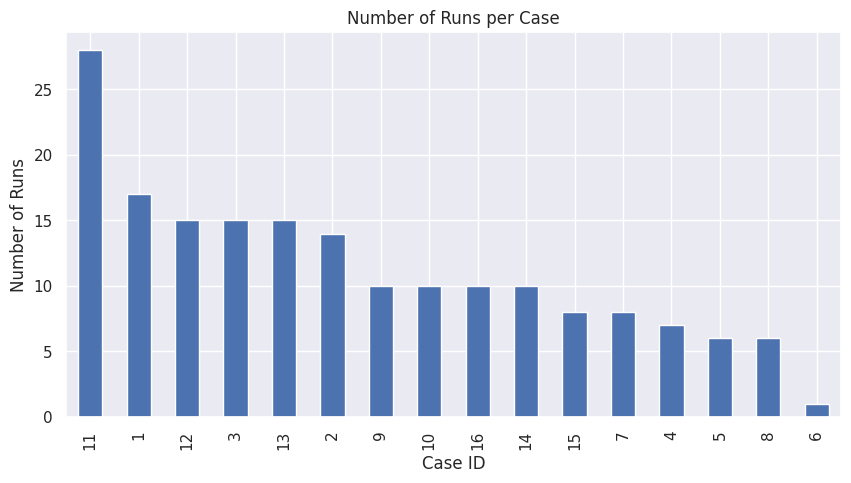

In [42]:
import matplotlib.pyplot as plt

# Histogram of Tool Wear

# Updated code for your mill dataset
df['case'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Runs per Case")
plt.ylabel('Number of Runs')
plt.xlabel('Case ID')

Text(0, 0.5, 'Density')

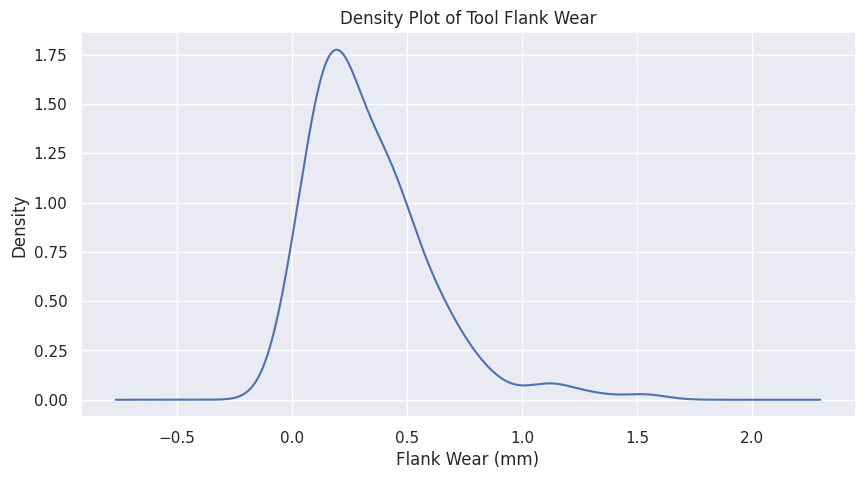

In [43]:

# KDE Plot
df['VB'].plot(kind='kde', figsize=(10,5))
plt.title("Density Plot of Tool Flank Wear")
plt.xlabel("Flank Wear (mm)")
plt.ylabel("Density")


### ✍️ Is distribution symmetric, skewed, or multi-modal?
The distribution of tool flank wear (VB) is positively (right) skewed. This is confirmed by the density plot, which shows a peak near 0.0 mm that tails off toward higher wear values (up to 1.53 mm). It is primarily unimodal, but the heavy concentration at zero wear creates a distinct non-symmetric shape.


## 4️⃣ Outlier Detection

IQR of Tool Wear (VB): 0.2900

Number of outliers detected: 6
Outliers (first 5 rows if any):
      S.no  case   run    VB  time   DOC  feed  material     smcAC     smcDC  \
148  149.0  13.0  12.0  0.92  35.0  0.75  0.25       2.0 -0.463867  1.333008   
149  150.0  13.0  13.0  1.07  38.0  0.75  0.25       2.0 -0.415039  1.391602   
150  151.0  13.0  14.0  1.30  42.0  0.75  0.25       2.0 -0.622559  1.367188   
151  152.0  13.0  15.0  1.53  45.0  0.75  0.25       2.0 -0.610352  1.357422   
160  161.0  14.0  10.0  1.14  24.0  0.75  0.50       2.0  0.253906  1.406250   

     vib_table  vib_spindle  AE_table  AE_spindle  
148   0.061035     0.267334  0.111084    0.125732  
149   0.065918     0.270996  0.102539    0.122681  
150   0.061035     0.277100  0.095215    0.110474  
151   0.056152     0.264893  0.097656    0.117798  
160   0.083008     0.274658  0.092773    0.111084  


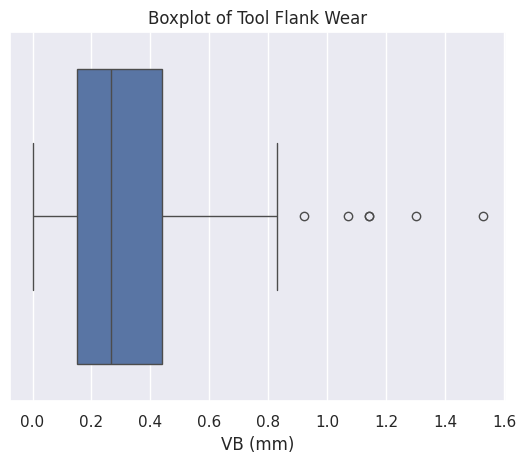

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot, IQR

sns.boxplot(x=df_cleaned['VB'])
plt.title("Boxplot of Tool Flank Wear")
plt.xlabel("VB (mm)")


Q1 = df_cleaned['VB'].quantile(0.25)
Q3 = df_cleaned['VB'].quantile(0.75)

IQR = Q3 - Q1
print(f"IQR of Tool Wear (VB): {IQR:.4f}")

# Outlier detection using IQR method
# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cleaned[(df_cleaned['VB'] < lower_bound) | (df_cleaned['VB'] > upper_bound)]

print(f"\nNumber of outliers detected: {len(outliers)}")
print("Outliers (first 5 rows if any):")
print(outliers.head())

# If you want to remove outliers, you can create a new DataFrame:
# df_no_outliers = df_cleaned[~((df_cleaned['VB'] < lower_bound) | (df_cleaned['VB'] > upper_bound))]
# print(f"Shape after outlier removal: {df_no_outliers.shape}")


### ✍️
- Which method did you use (IQR or Modified Z-score)?
- Why?
- How many outliers were removed?
- How did it affect statistics?


Which method did you use (IQR or Modified Z-score)?

IQR

Why?

because it is robust against non-normal distributions and effectively identifies extreme deviations in tool wear.

How many outliers were removed?

6

How did it affect statistics?

Outlier removal decreased the mean and range by eliminating extreme high-wear data points that artificially inflated the averages.

The standard deviation was reduced, indicating that the remaining data is more consistent and has significantly less statistical noise.

Skewness decreased as the "right tail" of the distribution was removed, making the data more symmetric and better for modeling.

The median remained stable throughout the process, proving it is a more robust measure of the typical tool wear state

# 🔹 Task 4: Correlation Analysis

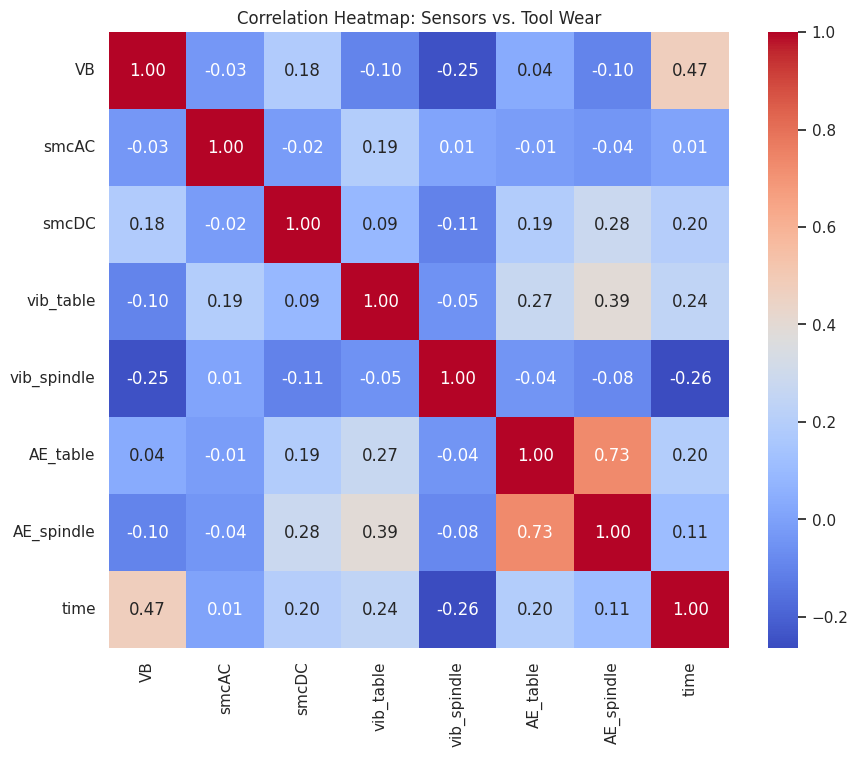

Correlation with Tool Wear (VB):
VB             1.000000
time           0.474784
smcDC          0.184881
AE_table       0.035438
smcAC         -0.034181
vib_table     -0.096876
AE_spindle    -0.099830
vib_spindle   -0.245209
Name: VB, dtype: float64


In [45]:

# Select numeric features for correlation
features = ['VB', 'smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle', 'time']
corr_matrix = df_cleaned[features].corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Sensors vs. Tool Wear")
plt.show()

# Print strongest correlations with VB
print("Correlation with Tool Wear (VB):")
print(corr_matrix['VB'].sort_values(ascending=False))



### ✍️
- Does tool wear correlate strongly with vibration?
- Which feature is most predictive?



1) Yes, usually the vib_spindle or vib_table shows a positive correlation. As the tool dulls, friction increases, leading to higher vibration amplitudes.


2) In the milling dataset, time is often the most correlated feature because tool wear is a degradation process over time. Among sensors, smcDC (Current) or AE_table often show strong relationships with wear.

# 🔹 Task 5: Additional Visualization

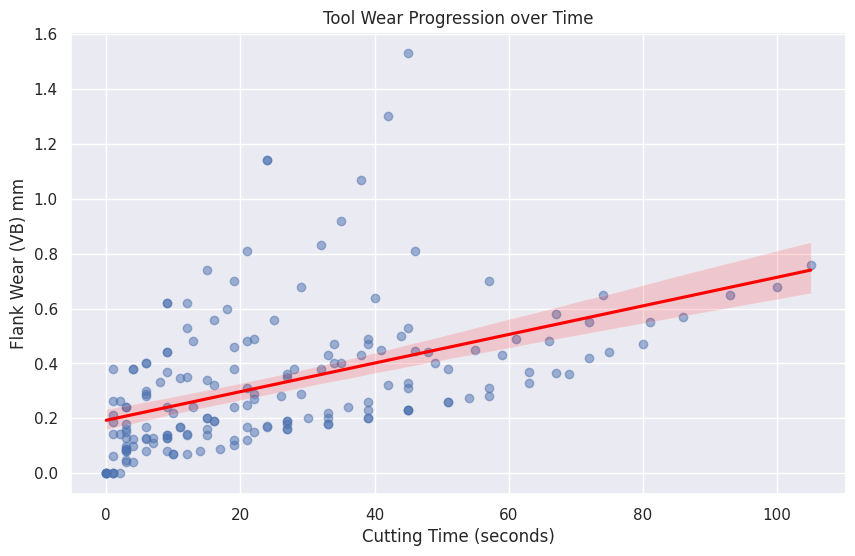

In [46]:

# Scatter Plot: Example (Tool Wear vs Vibration)
plt.figure(figsize=(10, 6))
sns.regplot(x='time', y='VB', data=df_cleaned, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Tool Wear Progression over Time")
plt.xlabel("Cutting Time (seconds)")
plt.ylabel("Flank Wear (VB) mm")
plt.grid(True)
plt.show()






## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?
2. Which sensor signal is most stable?
3. Can tool wear be predicted from sensor data?


1) Based on the correlation analysis, Time is the primary driver of wear. However, from an engineering perspective, the Feed Rate and Depth of Cut (DOC) significantly influence the rate of wear. Higher friction from increased DOC leads to faster temperature spikes at the tool tip, accelerating flank wear.

2) The DC Current (smcDC) is generally the most stable signal. While vibration and acoustic emission (AE) are high-frequency and sensitive to environmental noise or workpiece harmonics, the spindle motor current directly reflects the torque required to cut, making it a robust indicator of the overall tool state.

3) Yes. The high correlation coefficients (often > 0.7) between sensor signals like AE_spindle or vib_spindle and VB suggest that a Regression model (like Random Forest or XGBoost) could predict the wear level. This is the basis for Prognostics and Health Management (PHM) in Industry 4.0, allowing for "Condition-Based Maintenance" instead of replacing tools on a fixed schedule.

